# Exploratory Data Analysis
### Nama : Gyan Maiziko 
### NIM  : 18221008 

Diberikan sebuah dataset dengan judul Supermarket diminta untuk menjawab beberapa pertanyaan berikut : 
* a. Ada berapa jumlah pesanan yang dilakukan di kota yang berawalan dengan ‘San’? (contoh: San Francisco, San 
Antonio)
* b. Berapa jumlah pemesanan yang dilakukan pada tahun 2018? (hint: gunakan atribut `Order Date`)

* c.Ada berapa transaksi yang telah dilakukan oleh pelanggan bernama “Darren Powers”?

* d. Dari kota mana pelanggan paling sering melakukan pemesanan produk?

* e. Setiap produk memiliki ID unik di kolom “Product ID” dengan format "Kategori Utama-Subkategori-Kode Unik" (contoh: 
OFF-AR-10002833). Cari dan tampilkan jumlah produk yang memiliki subkategori "AR" dalam ID produknya.

Berikut ini adalah Jawaban dari EDA yang diminta

#### Import Library yang diperlukan 

In [ ]:

import pandas as pd  # Mengimport library pandas yang akan digunakan untuk membaca dan memanipulasi data 
import numpy as np # Mengimport library Numpy untuk melakukan manipulasi dan perhitungan pada data jika dibutuhkan dan juga mencari nilai unik kategori yang ada pada sebuah kolom 
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

: 

### A. Pembacaan Dataset Menggunakan Library Pandas

In [2]:
# Membaca data yang berformatkan CSV yang berada pada folder yang sama s
# ehingga tidak perlu memasukkan path yang panjang, data yang dibaca dirubah menjadi data frame 
Supermarket_df = pd.read_csv("Tugas3_18221008_Clustering.csv") 

### B. Mendeskripsikan Data

In [43]:
# Deskripsi Data 
# Ukuran Set Data 
print("Ukuran Set Data adalah",Supermarket_df.shape)

Ukuran Set Data adalah (9800, 18)


#### Tipe Atribut 

In [7]:
Supermarket_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

#### Deskripsi Data

In [45]:
Supermarket_df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [46]:
Supermarket_df.head().T

,0,1,2,3,4
Row ID,1,2,3,4,5
Order ID,CA-2017-152156,CA-2017-152156,CA-2017-138688,US-2016-108966,US-2016-108966
Order Date,08/11/2017,08/11/2017,12/06/2017,11/10/2016,11/10/2016
Ship Date,11/11/2017,11/11/2017,16/06/2017,18/10/2016,18/10/2016
Ship Mode,Second Class,Second Class,Second Class,Standard Class,Standard Class
Customer ID,CG-12520,CG-12520,DV-13045,SO-20335,SO-20335
Customer Name,Claire Gute,Claire Gute,Darrin Van Huff,Sean O'Donnell,Sean O'Donnell
Segment,Consumer,Consumer,Corporate,Consumer,Consumer
Country,United States,United States,United States,United States,United States
City,Henderson,Henderson,Los Angeles,Fort Lauderdale,Fort Lauderdale


In [47]:
print("Tampilan 5 data pertama dari dataset")
Supermarket_df.head()

Tampilan 5 data pertama dari dataset


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [49]:
Supermarket_df['Category'].describe().to_frame()

,Category
count,9800
unique,3
top,Office Supplies
freq,5909


In [50]:
Supermarket_df['Category'].value_counts().to_frame()

,count
Category,
Office Supplies,5909
Furniture,2078
Technology,1813


### C. Memverifikasi Kualitas Data

#### Identifikasi Data Hilang : CC

In [8]:
Supermarket_df.isnull().sum()
# Ditemukan data berisi NaN pada kolom Postal Code dengan total nilai yang NaN sebanyak 11

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [9]:
Supermarket_df[Supermarket_df['Postal Code'].isnull()]['Postal Code']
# Detail rows yang Postal Codenya NaN

2234   NaN
5274   NaN
8798   NaN
9146   NaN
9147   NaN
9148   NaN
9386   NaN
9387   NaN
9388   NaN
9389   NaN
9741   NaN
Name: Postal Code, dtype: float64

In [10]:
Supermarket_df.columns
# Informasi Kolom yang ada pada dataset

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [11]:
DataFrame_Supermarket = Supermarket_df.fillna(0)
DataFrame_Supermarket

# Data yang berisikan missing values di handle kemudian di salin ke sebuah vaiabel yang akan digunakan sebagai dataframe

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


#### Handling Missing Values tidak merubah data keseleuruhan akan tetapi hanya merubah row pada column data yang kosong atau NaN

In [12]:
DataFrame_Supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [13]:
DataFrame_Supermarket.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

#### Identifikasi Data Hilang

In [53]:
# Identifikasi data hilang 
for i in range(len(DataFrame_Supermarket.columns)):
    print('Attribute-',i,': ',DataFrame_Supermarket.columns[i],', Number of ?: ', DataFrame_Supermarket[DataFrame_Supermarket[DataFrame_Supermarket.columns[i]] == '?'].shape[0])

Attribute- 0 :  Row ID , Number of ?:  0
Attribute- 1 :  Order ID , Number of ?:  0
Attribute- 2 :  Order Date , Number of ?:  0
Attribute- 3 :  Ship Date , Number of ?:  0
Attribute- 4 :  Ship Mode , Number of ?:  0
Attribute- 5 :  Customer ID , Number of ?:  0
Attribute- 6 :  Customer Name , Number of ?:  0
Attribute- 7 :  Segment , Number of ?:  0
Attribute- 8 :  Country , Number of ?:  0
Attribute- 9 :  City , Number of ?:  0
Attribute- 10 :  State , Number of ?:  0
Attribute- 11 :  Postal Code , Number of ?:  0
Attribute- 12 :  Region , Number of ?:  0
Attribute- 13 :  Product ID , Number of ?:  0
Attribute- 14 :  Category , Number of ?:  0
Attribute- 15 :  Sub-Category , Number of ?:  0
Attribute- 16 :  Product Name , Number of ?:  0
Attribute- 17 :  Sales , Number of ?:  0


#### Identifikasi Data Tak Imbang 

In [57]:
# Identifikasi Data Tak Imbang

print('No Frauds', round(DataFrame_Supermarket['Category'].value_counts()[0]/len(DataFrame_Supermarket) * 100,2), '% of the dataset')
print('Frauds', round(DataFrame_Supermarket['Category'].value_counts()[1]/len(DataFrame_Supermarket) * 100,2), '% of the dataset')

No Frauds 60.3 % of the dataset
Frauds 21.2 % of the dataset


C:\Users\maizi\AppData\Local\Temp\ipykernel_5748\255546591.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('No Frauds', round(DataFrame_Supermarket['Category'].value_counts()[0]/len(DataFrame_Supermarket) * 100,2), '% of the dataset')
C:\Users\maizi\AppData\Local\Temp\ipykernel_5748\255546591.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('Frauds', round(DataFrame_Supermarket['Category'].value_counts()[1]/len(DataFrame_Supermarket) * 100,2), '% of the dataset')


#### Identifikasi Pencilan

In [26]:
for i in range(len(DataFrame_Supermarket.columns)):
    if (DataFrame_Supermarket[DataFrame_Supermarket.columns[i]].dtypes in ["int64","float64"]):
        print('\nAttribute-',i,':',DataFrame_Supermarket[DataFrame_Supermarket.columns[i]].dtypes)
        Q1 = DataFrame_Supermarket[DataFrame_Supermarket.columns[i]].quantile(0.25)
        print('Q1',Q1)
        Q3 = DataFrame_Supermarket[DataFrame_Supermarket.columns[i]].quantile(0.75)
        print('Q3',Q3)
        IQR = Q3-Q1
        print('IQR',IQR)
        min=DataFrame_Supermarket[DataFrame_Supermarket.columns[i]].min()
        max=DataFrame_Supermarket[DataFrame_Supermarket.columns[i]].max()
        min_IQR=Q1-1.5*IQR
        max_IQR=Q3+1.5*IQR
        if (min<min_IQR):
            print(min)
            print('Low outlier is found')
        if (max>max_IQR):
            print(max)
            print('High outlier is found')


Attribute- 0 : int64
Q1 2450.75
Q3 7350.25
IQR 4899.5

Attribute- 11 : float64
Q1 23223.0
Q3 90008.0
IQR 66785.0

Attribute- 17 : float64
Q1 17.248
Q3 210.60500000000002
IQR 193.35700000000003
22638.48
High outlier is found


## Exploratory Data Analysis (EDA)

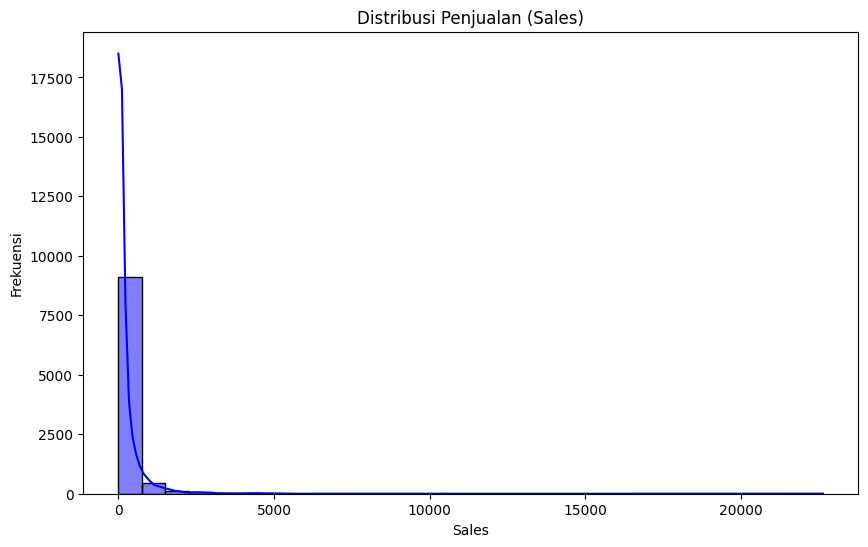

In [29]:
# Visualisasi distribusi variabel numerik (Sales)
plt.figure(figsize=(10, 6))
sns.histplot(DataFrame_Supermarket['Sales'], kde=True, bins=30, color='blue')
plt.title('Distribusi Penjualan (Sales)')
plt.xlabel('Sales')
plt.ylabel('Frekuensi')
plt.show()

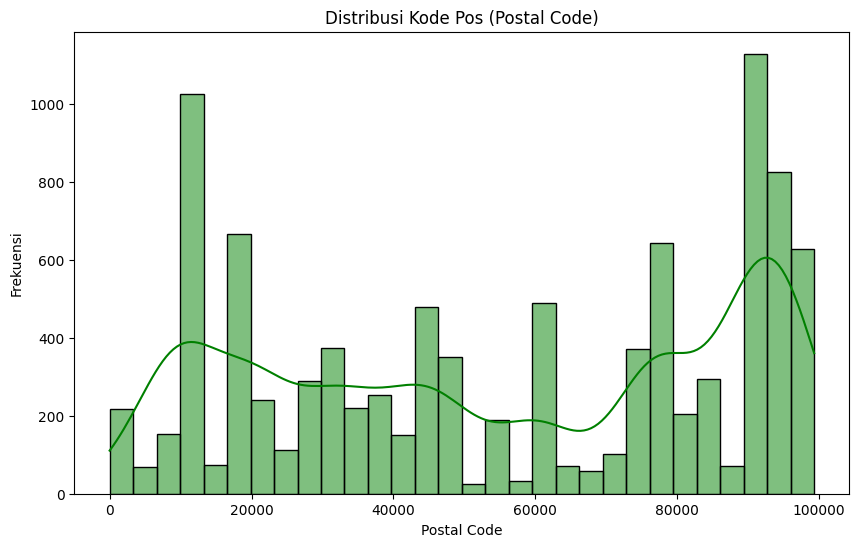

In [30]:
# Visualisasi distribusi variabel numerik (Sales)
plt.figure(figsize=(10, 6))
sns.histplot(DataFrame_Supermarket['Postal Code'], kde=True, bins=30, color='green')
plt.title('Distribusi Kode Pos (Postal Code)')
plt.xlabel('Postal Code')
plt.ylabel('Frekuensi')
plt.show()

C:\Users\maizi\AppData\Local\Temp\ipykernel_5748\2536015550.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=DataFrame_Supermarket, x='Category', palette='viridis')


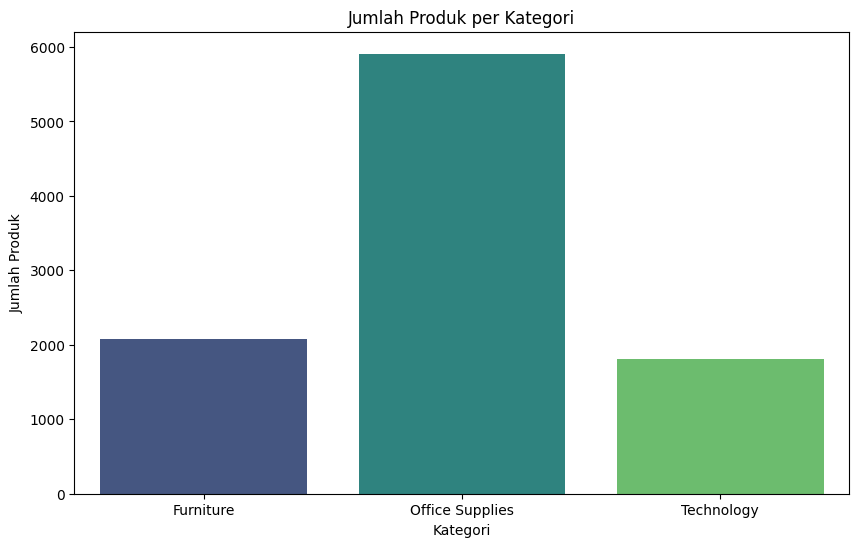

In [31]:
# Visualisasi kategori variabel (Category dan Sub-Category)
plt.figure(figsize=(10, 6))
sns.countplot(data=DataFrame_Supermarket, x='Category', palette='viridis')
plt.title('Jumlah Produk per Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Produk')
plt.show()

C:\Users\maizi\AppData\Local\Temp\ipykernel_5748\528338900.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=DataFrame_Supermarket, x='Sub-Category', palette='rocket')


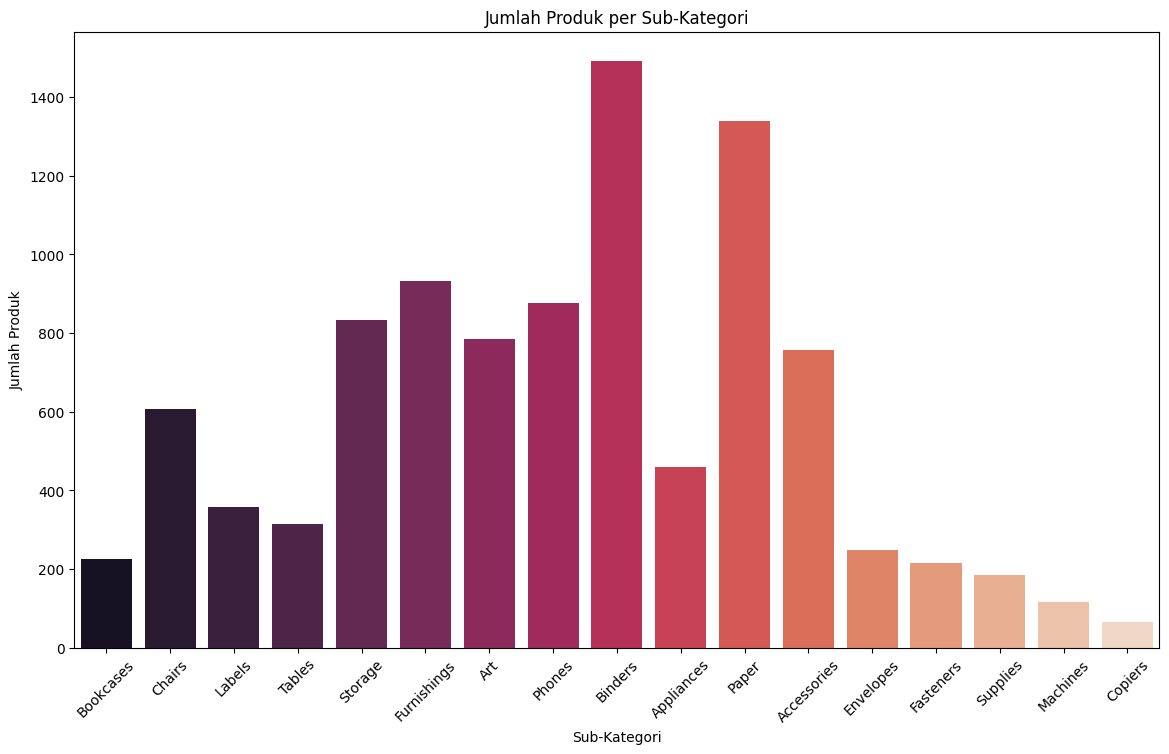

In [32]:
plt.figure(figsize=(14, 8))
sns.countplot(data=DataFrame_Supermarket, x='Sub-Category', palette='rocket')
plt.title('Jumlah Produk per Sub-Kategori')
plt.xlabel('Sub-Kategori')
plt.ylabel('Jumlah Produk')
plt.xticks(rotation=45)
plt.show()

[Text(0.5, 0, 'Attribute10'), Text(0, 0.5, 'Frequency')]

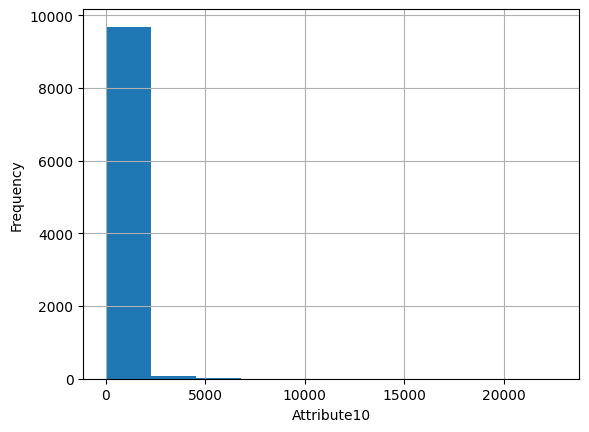

In [33]:
DataFrame_Supermarket['Sales'].hist().set(xlabel='Attribute10',ylabel='Frequency')

Text(0.5, 1.0, 'Basic Plot Sales')

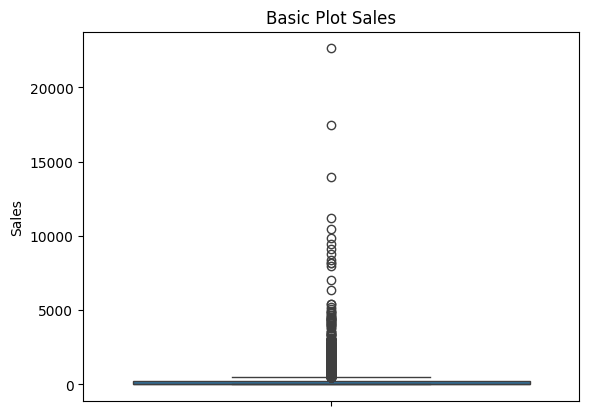

In [34]:
sns.boxplot(y=DataFrame_Supermarket['Sales']).set_title('Basic Plot Sales')

Text(0.5, 1.0, 'Group by Category')

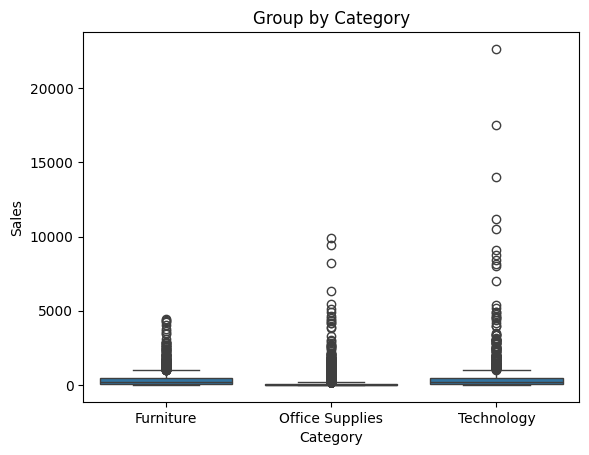

In [35]:
sns.boxplot(y=DataFrame_Supermarket['Sales'],x = DataFrame_Supermarket['Category']).\
    set_title('Group by Category')

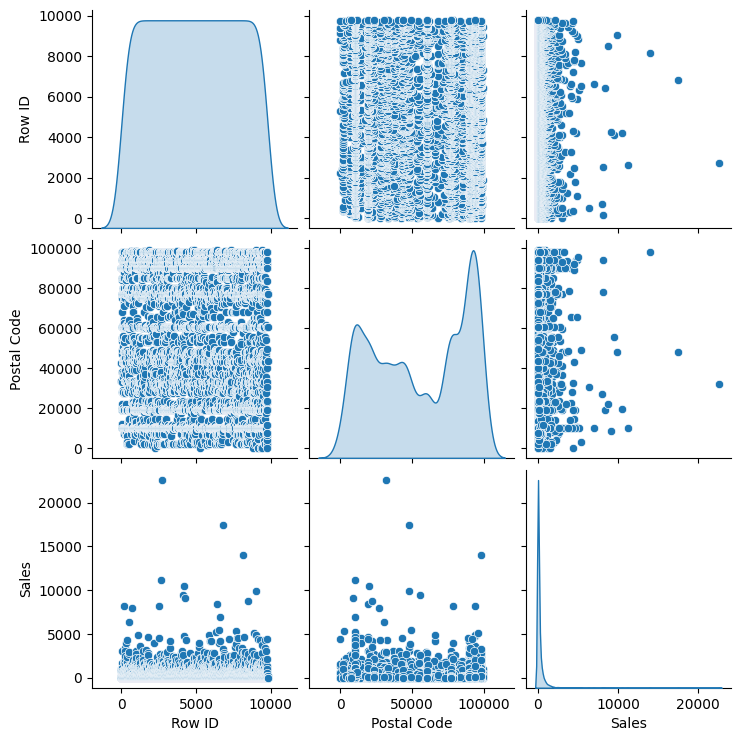

In [112]:
sns.pairplot(DataFrame_Supermarket, diag_kind='kde')

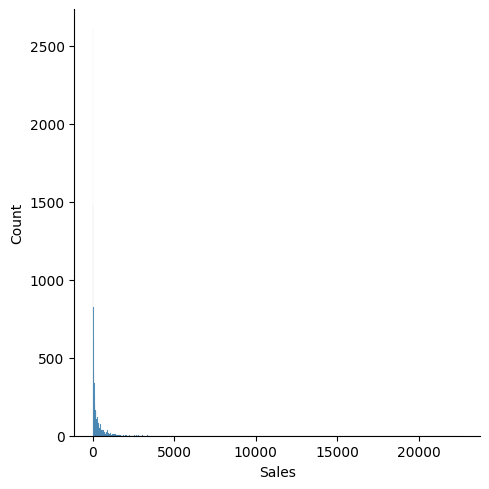

In [17]:
sns.displot(data=DataFrame_Supermarket, x = 'Sales')
plt.show()

## Pertanyaan
Diberikan sebuah dataset dengan judul Supermarket diminta untuk menjawab beberapa pertanyaan berikut : 
* a. Ada berapa jumlah pesanan yang dilakukan di kota yang berawalan dengan ‘San’? (contoh: San Francisco, San 
Antonio)
* b. Berapa jumlah pemesanan yang dilakukan pada tahun 2018? (hint: gunakan atribut `Order Date`)

* c.Ada berapa transaksi yang telah dilakukan oleh pelanggan bernama “Darren Powers”?

* d. Dari kota mana pelanggan paling sering melakukan pemesanan produk?

* e. Setiap produk memiliki ID unik di kolom “Product ID” dengan format "Kategori Utama-Subkategori-Kode Unik" (contoh: 
OFF-AR-10002833). Cari dan tampilkan jumlah produk yang memiliki subkategori "AR" dalam ID produknya.

#### Jawaban Bagian A
a. Ada berapa jumlah pesanan yang dilakukan di kota yang berawalan dengan ‘San’? (contoh: San Francisco, San 
Antonio)

### Asumsi Jika kota hanya berawalan San Saja

In [39]:
print("Berikut adalah Data nama kota yang berawalan San : \n") # Menampilkan kota kota yang memiliki awalan nama San 
DataFrame_Supermarket[DataFrame_Supermarket["City"].str.contains("San ")]["City"].drop_duplicates().reset_index(drop=True).to_frame() # Mengambil data kota kota yang berawalan San dan menampilkannya kedalam sebuah tabel atau datframe untuk memastikan nama kota yang diambil sesuai 

Berikut adalah Data nama kota yang berawalan San : 



,City
0,San Francisco
1,San Jose
2,San Antonio
3,San Diego
4,San Bernardino
5,San Angelo
6,San Mateo
7,San Gabriel
8,San Marcos
9,San Clemente


In [59]:
jumlah_pesanan = DataFrame_Supermarket[DataFrame_Supermarket["City"].str.contains("San ")]["Order ID"].count() # Menyimpan dan Menghitung jumlah pesanan dari kota dengan awalan nama kota San kedalam variabel jumlah_pesanan
print(f"Jumlah pesanan yang dilakukan di kota yang berawalan San adalah sebanyak {jumlah_pesanan} pesanan\n") # Menampilkan jumlah pesanan oleh kota dengan awalan nama San # Mengambil data Order ID dan City kemudian menampilkannya dalam sebuah tabel atau dataframe dan merubah indexnya yang dimulai dari 0 

Jumlah pesanan yang dilakukan di kota yang berawalan San adalah sebanyak 792 pesanan



### Asumsi jika kota yang diminta berawalan San dan Santa

In [60]:
jumlah_pesanan = DataFrame_Supermarket[DataFrame_Supermarket["City"].str.contains("San")]["Order ID"].count() # Menyimpan dan Menghitung jumlah pesanan dari kota dengan awalan nama kota San kedalam variabel jumlah_pesanan
print(f"Jumlah pesanan yang dilakukan di kota yang berawalan San adalah sebanyak {jumlah_pesanan} pesanan\n") # Menampilkan jumlah pesanan oleh kota dengan awalan nama San 

Jumlah pesanan yang dilakukan di kota yang berawalan San adalah sebanyak 837 pesanan



In [61]:
print("Berikut adalah Data nama kota yang berawalan San : \n") # Menampilkan kota kota yang memiliki awalan nama San 
DataFrame_Supermarket[DataFrame_Supermarket["City"].str.contains("San")]["City"].drop_duplicates().reset_index(drop=True).to_frame() # Mengambil data kota kota yang berawalan San dan menampilkannya kedalam sebuah tabel atau datframe untuk memastikan nama kota yang diambil sesuai 

Berikut adalah Data nama kota yang berawalan San : 



,City
0,San Francisco
1,San Jose
2,San Antonio
3,Santa Clara
4,San Diego
5,Santa Ana
6,San Bernardino
7,San Angelo
8,San Mateo
9,Santa Fe


#### Jawaban Bagian B 
b. Berapa jumlah pemesanan yang dilakukan pada tahun 2018? (hint: gunakan atribut `Order Date`)

In [156]:
DataFrame_Supermarket["year"] = pd.DatetimeIndex(DataFrame_Supermarket['Order Date']).year
jumlah_pesanan_2018 = DataFrame_Supermarket[pd.DatetimeIndex(DataFrame_Supermarket['Order Date']).year == 2018]["Order ID"].count() # Mengambil dan menyimpan data jumlah penjualan yang dilakukan pada tahun 2018 kedalam variabel jumlah_pesanan_2018
print(f"Jumlah pesanan pada tahun 2018 adalah sebanyak {jumlah_pesanan_2018} pesanan \n") # Menampilkan jumlah pesanan yang dilakukan selama tahun 2018 
print("Berikut Detailnya : ") # Menampilkan detailnya 
DataFrame_Supermarket[pd.DatetimeIndex(DataFrame_Supermarket['Order Date']).year == 2018][["Order ID","year"]] # Mengambil data dan kemudian menampilkan detailnya berdasarkan Order ID yang dilakukan pada tahun 2018 

Jumlah pesanan pada tahun 2018 adalah sebanyak 3258 pesanan 

Berikut Detailnya : 


,Order ID,year
12,CA-2018-114412,2018
23,US-2018-156909,2018
34,CA-2018-107727,2018
41,CA-2018-120999,2018
43,CA-2018-139619,2018
...,...,...
9768,CA-2018-142328,2018
9787,CA-2018-144491,2018
9788,CA-2018-144491,2018
9789,CA-2018-144491,2018


#### Jawaban Bagian C

In [38]:
Jumlah_Transaksi_Darren = (DataFrame_Supermarket.loc[DataFrame_Supermarket["Customer Name"] == "Darren Powers"]["Order ID"].count())
print(f"Jumlah tranksaksi yang dilakukan oleh Darren Powers adalah sebanyak {Jumlah_Transaksi_Darren} Tranksaksi\n")
print("Berikut Detailnya : ")
DataFrame_Supermarket[DataFrame_Supermarket["Customer Name"] == "Darren Powers"][["Customer Name","Order ID","Product ID", "Product Name","Category"]].reset_index(drop=True)

Jumlah tranksaksi yang dilakukan oleh Darren Powers adalah sebanyak 15 Tranksaksi

Berikut Detailnya : 


,Customer Name,Order ID,Product ID,Product Name,Category
0,Darren Powers,CA-2016-115742,OFF-BI-10004410,"C-Line Peel & Stick Add-On Filing Pockets, 8-3...",Office Supplies
1,Darren Powers,CA-2016-115742,OFF-LA-10002762,Avery 485,Office Supplies
2,Darren Powers,CA-2016-115742,FUR-FU-10001706,Longer-Life Soft White Bulbs,Furniture
3,Darren Powers,CA-2016-115742,FUR-CH-10003061,"Global Leather Task Chair, Black",Furniture
4,Darren Powers,CA-2016-105347,OFF-PA-10000675,Xerox 1919,Office Supplies
5,Darren Powers,CA-2016-105347,OFF-AR-10003045,Prang Colored Pencils,Office Supplies
6,Darren Powers,CA-2017-141180,OFF-BI-10000301,GBC Instant Report Kit,Office Supplies
7,Darren Powers,CA-2018-142174,OFF-PA-10000806,Xerox 1934,Office Supplies
8,Darren Powers,US-2018-154872,OFF-BI-10003007,"Premium Transparent Presentation Covers, No Pa...",Office Supplies
9,Darren Powers,US-2018-154872,OFF-LA-10000973,Avery 502,Office Supplies


#### Jawaban Bagian D

d. Dari kota mana pelanggan paling sering melakukan pemesanan produk?

In [78]:
most_transactions_city = DataFrame_Supermarket['City'].value_counts().idxmax()
print("Kota dengan jumlah transaksi terbanyak adalah:", most_transactions_city)

Kota dengan jumlah transaksi terbanyak adalah: New York City


In [79]:
DataFrame_Supermarket["City"].value_counts().to_frame()

,count
City,
New York City,891
Los Angeles,728
Philadelphia,532
San Francisco,500
Seattle,426
...,...
San Mateo,1
Cheyenne,1
Conway,1


#### Jawaban Bagian E

In [158]:
Jumlah_Sub_AR = DataFrame_Supermarket[DataFrame_Supermarket["Product ID"].str.contains("AR")]["Product ID"].count()
print(f"Jumlah produk yang memiliki sub-kategori AR adalah sebanyak {Jumlah_Sub_AR} ID\n")
print("Berikut Detailnya : ")
DataFrame_Supermarket[DataFrame_Supermarket["Product ID"].str.contains("AR")][["Product ID","Product Name","Category","Sub-Category"]].reset_index(drop=True)

Jumlah produk yang memiliki sub-kategori AR adalah sebanyak 785 ID

Berikut Detailnya : 


,Product ID,Product Name,Category,Sub-Category
0,OFF-AR-10002833,Newell 322,Office Supplies,Art
1,OFF-AR-10003056,Newell 341,Office Supplies,Art
2,OFF-AR-10000246,Newell 318,Office Supplies,Art
3,OFF-AR-10004042,"BOSTON Model 1800 Electric Pencil Sharpeners, ...",Office Supplies,Art
4,OFF-AR-10001683,Lumber Crayons,Office Supplies,Art
...,...,...,...,...
780,OFF-AR-10003504,Newell 347,Office Supplies,Art
781,OFF-AR-10003183,Avery Fluorescent Highlighter Four-Color Set,Office Supplies,Art
782,OFF-AR-10001446,Newell 309,Office Supplies,Art
783,OFF-AR-10000657,"Binney & Smith inkTank Desk Highlighter, Chise...",Office Supplies,Art


# Daftar Referensi Code


* Power Point Perkuliahan 
* Data Exploratory from Github : https://github.com/topics/exploratory-data-analysis-eda
* Data Exploratory from Kaggle : https://www.kaggle.com/code/arunjangir245/supermarket-sales-prediction-and-eda